<font size='3'> 
**Warming up**:   
1. Use the dataframe given below, count the number of males and females for each location using crosstab( ).
2. Count how many unique values does 'Name' column has. 
</font>

In [1]:
import pandas as pd
Name = ['tom', 'krish', 'nick', 'juli']    
Sex = ['male','male','male','female']
Salary = [60000, 55000, 80000,74000]
Location = ['CA','CA','VA','CA']    

list_of_tuples = list(zip(Name,Sex, Location,Salary))  
df = pd.DataFrame(list_of_tuples, columns = ['Name','Sex','Location','Salary'])  
df

,Name,Sex,Location,Salary
0,tom,male,CA,60000
1,krish,male,CA,55000
2,nick,male,VA,80000
3,juli,female,CA,74000


***
<font size='3'> 
**At the end of today, you'll be able to**:
1. Create visualization for both categorical and numerical variables
2. Create a Random Forest model with GridSearchCV for parameter tuning
3. Interpret machine learning models
</font>

# Table of Contents 
1. [Essential Steps of Machine Learning](#steps)
2. [Data Information](#data)
3. [Data Preparation](#cleaning)
    - [Exercise1](#ex1)
4. [Fitting Model and Parameter Tuning](#model)
5. [Prediction and Evaluation](#prediction)
6. [Explanation](#explanation)
7. [Conclusion](#conclusion) 
8. [Practice & QA](#practice)
9. [Useful Topics & Packages](#useful)
***

<a id='steps'></a>
## 1. Essential steps of Machine learning with Sklearn
<font size='3'> 
The following is the basic flow for a machine learning project.However, depends on the data we have, we do not need to implement everything listed under 'data preparing'.In today's example, we only used the highlighted methods for data preprocessing.

1. Data Preparing
    - Missing values 
    - Duplications
    - Imbalance data 
    - Categorical features
        - Label encoding 
        - **One Hot Encoding** 
    - Numerical features
        - Normalization 
        - **Standardization**          
    - Feature engineering
2. Fitting models
3. Model evaluation 
4. Paramater Tuning
5. Prediction
</font>

***
<a id='data'></a>
## 2. [Data Information](https://www.kaggle.com/ronitf/heart-disease-uci)
<font size='3'>   
We are using a public heart disease dataset.
* **Background**: This database originally contains 76 attributes, but all published experiments refer to using a subset of 14 of them.The "goal" field refers to the presence of heart disease in the patient. In this example, we have 13 features,1 target variable,and 303 observations:
* **Attribute Information**:
    - **age**: The person's age in years
    - **sex**: The person's sex (1 = male, 0 = female)
    - **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
    - **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)
    - **chol**: The person's cholesterol measurement in mg/dl
    - **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
    - **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
    - **thalach**: The person's maximum heart rate achieved
    - **exang**: Exercise induced angina (1 = yes; 0 = no)
    - **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
    - **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
    - **ca**: The number of major vessels (0-3)
    - **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
    - **target**: Heart disease (0 = no, 1 = yes)
</font>

In [2]:
# ! pip install eli5
# ! pip install pdpbox
# ! pip install shap
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.pylab import rcParams

from sklearn.metrics import roc_curve,auc,make_scorer, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import eli5 # for permutation importance
from eli5.sklearn import PermutationImportance

import shap # for SHAP value
from pdpbox import pdp, info_plots # flor partial plots 

np.random.seed(123)
pd.options.mode.chained_assignment = None  #hide any pandas warnings
%matplotlib inline

***
<a id='cleaning'></a>
## 3. Data Preparing
In this step, we will do some basic descriptive analysis to the data, create visualizations, and implement data cleaning.

In [3]:
os.getcwd()

'/Users/rexitim/Documents/BDS bootcamp 2019/day3'

In [4]:
dt = pd.read_csv('day3 data and image/heart.csv')
dt.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dt.shape

(303, 14)

In [6]:
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dt.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
dt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# change variables names for interpretation
dt.columns = ['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg',\
              'max_heart_rate_achieved','exercise_induced_angina','st_depression','st_slope','num_major_vessels','thalassemia',\
             'target']

In [10]:
# change the values of categorical variablesdt
dt['sex'][dt['sex']==0] = 'female'
dt['sex'][dt['sex']==1] = 'male'

# the following do the same, just in a different way
dt['chest_pain_type'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'},inplace = True)
dt['fasting_blood_sugar'].replace({0:'lower than 120mg/ml',1:'greater than 120mg/ml'},inplace = True)
dt['rest_ecg'].replace({0:'normal',1:'ST-T wave abnormality',2:'left ventricular hypertrophy'},inplace = True)
dt['exercise_induced_angina'].replace({0:'no',1:'yes'},inplace = True)
dt['st_slope'].replace({0:'upsloping',1:'flat',2:'downsloping'},inplace = True)
dt['thalassemia'].replace({1:'normal',2:'fixed defect',3:'reversable defect'},inplace = True)

dt.head(2)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1


In [11]:
dt.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [12]:
num_features = dt.select_dtypes(include=['int64','float64']).drop('target', axis = 1)
cat_features = dt.select_dtypes(include='object')
print('Number of numerical features: {0:0.0f} \nNumber of categorical features: {1:0.0f}'.format(len(num_features.columns),len(cat_features.columns)))


Number of numerical features: 6 
Number of categorical features: 7


#### Numerical Features
First, let's check the distribution of numerical features

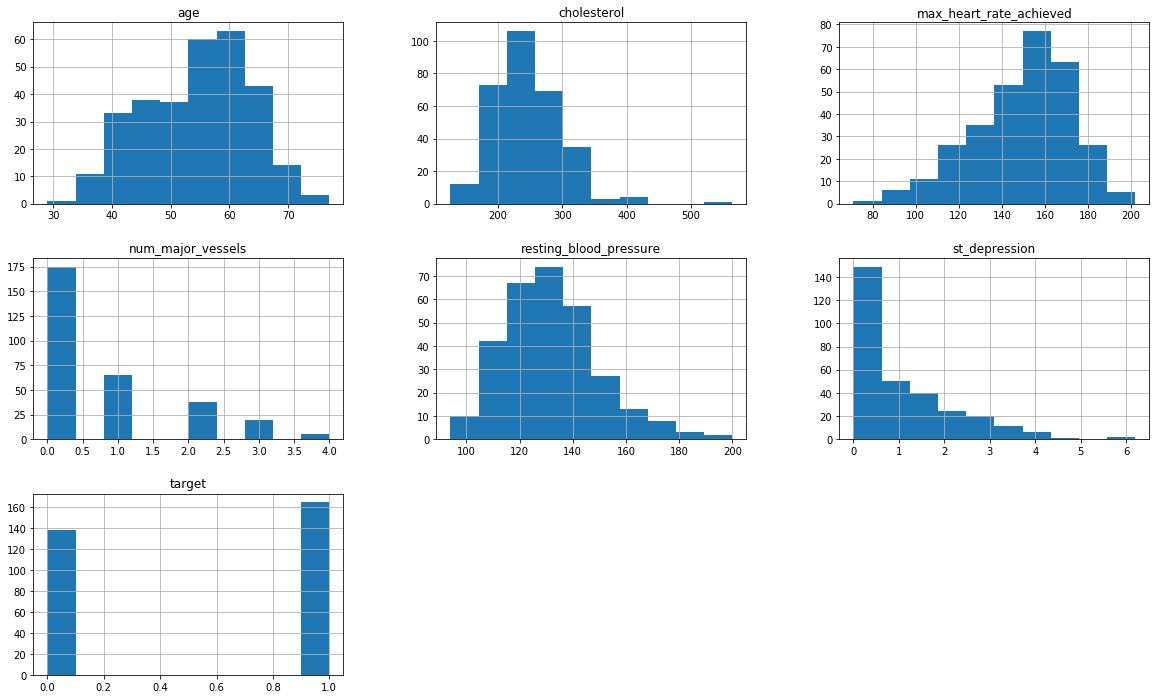

In [13]:
fig, ax = plt.subplots(figsize=(20,12))
dt.hist(ax = ax)
plt.show()

We can also take a look at the distribution for the numerical variables by target using violin plot:

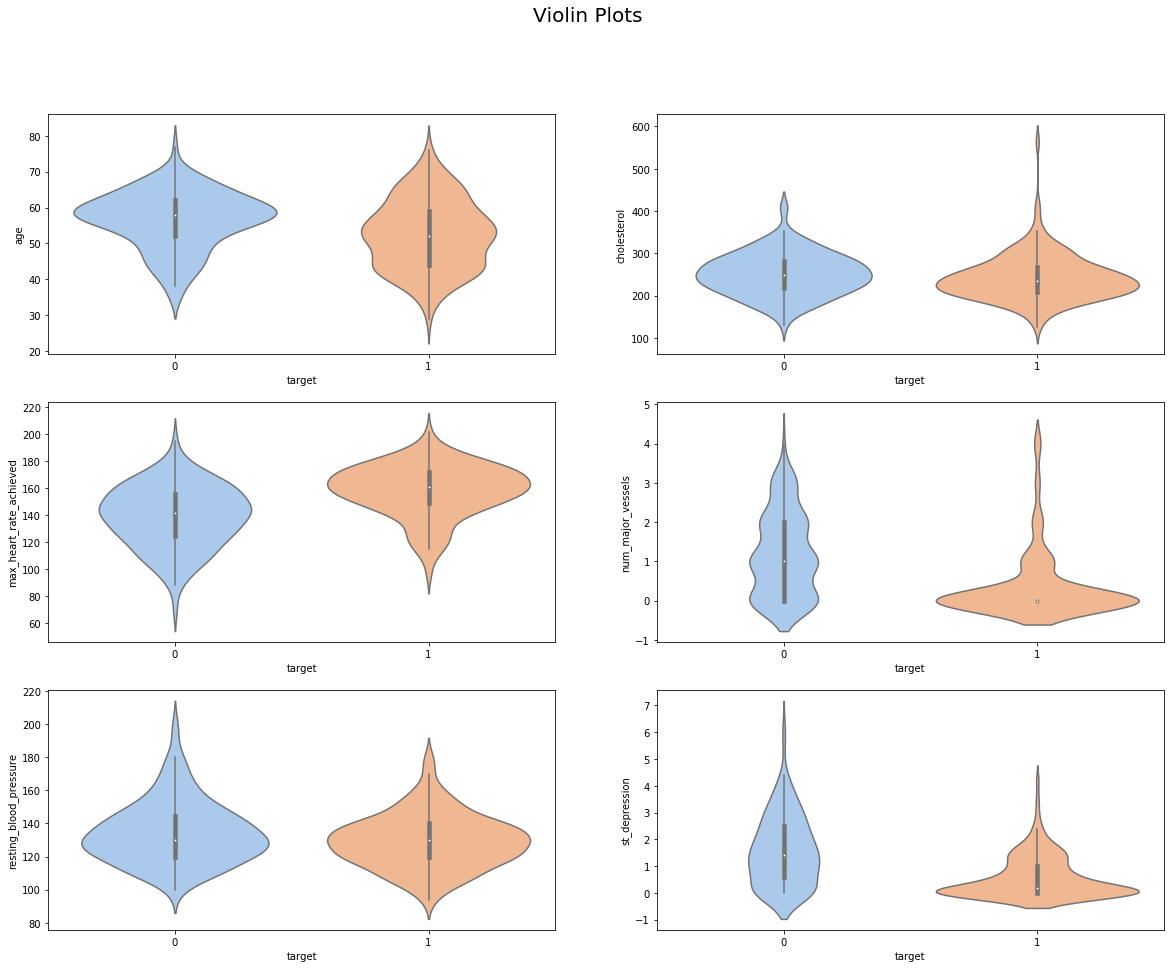

In [14]:
# create a 3 * 2 grid
fig, ax = plt.subplots(3,2,figsize = (20,15))

# create violin plots and fill in each cell of the grid
sns.violinplot(x='target',y = 'age',data=dt,ax=ax[0][0],palette="pastel") # the first cell of grid
sns.violinplot(x='target',y = 'cholesterol',data=dt,ax=ax[0][1],palette="pastel",) # 1st row, 2nd column 
sns.violinplot(x='target',y = 'max_heart_rate_achieved',data=dt,ax=ax[1][0],palette="pastel",)
sns.violinplot(x='target',y = 'num_major_vessels',data=dt,ax=ax[1][1],palette="pastel",)
sns.violinplot(x='target',y = 'resting_blood_pressure',data=dt,ax=ax[2][0],palette="pastel",)
sns.violinplot(x='target',y = 'st_depression',data=dt,ax=ax[2][1],palette="pastel",)

fig.suptitle('Violin Plots',fontsize = 20)

plt.show()

**Some Observations**:
* age: diseased population seems to have a slightly smaller age than healthy population in general.
* cholesterol: similar for two groups.
* number of major vessels: diseased population has high probability of having 0 major vessels.

Numbers of diseased and healthy observations for each age value:

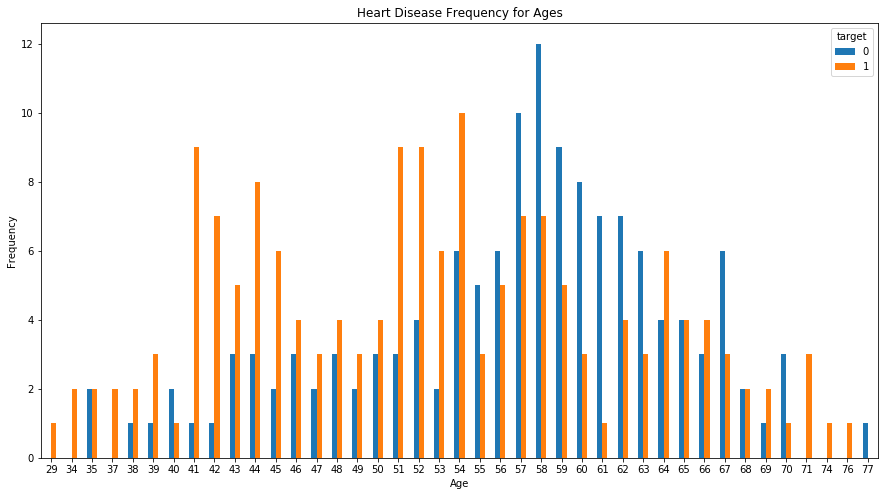

In [15]:
pd.crosstab(dt.age,dt.target).plot(kind='bar',figsize=(15,8)) 
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation ='horizontal')
plt.ylabel('Frequency')

plt.show()

**Observations**:
* Younger and older age group have less people having heart disease, whereas middle age group have more diseased observations. 

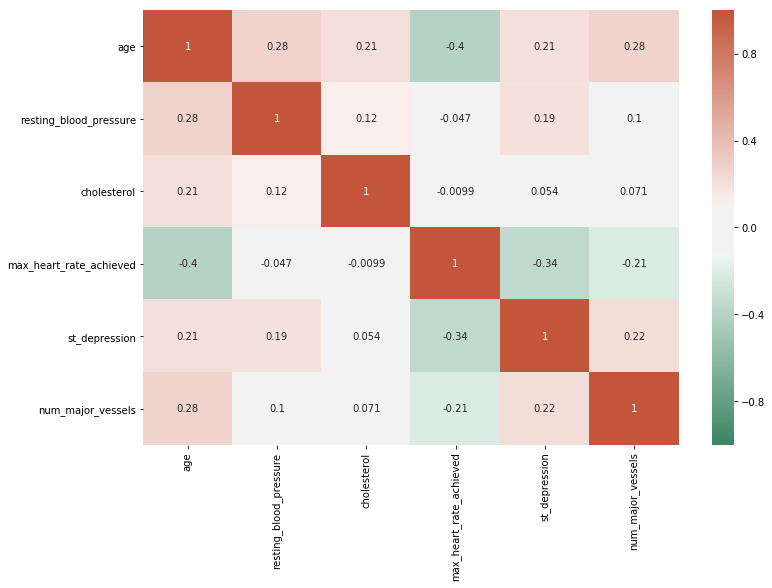

In [16]:
# correlation plot
fig, ax = plt.subplots(figsize = (12,8))
cmap = sns.diverging_palette(150, 20, sep=30, as_cmap=True) # define color palette 
correlation = dt.select_dtypes(include=['int64','float64']).drop('target',axis = 1).corr() # calculate correlation without target
sns.heatmap(data = correlation, annot= True, vmin=-1, vmax=1,center = 0,cmap=cmap)
plt.show()

**Observations**:
* number of major vessels has the strongest positive correlation with age, which is odd.Need more investigation.
* maximum heart rate achieved has the strongest negative correlation with age, meaning as age grows,maximum heart rate achieved will decrease.

In [17]:
# mean for numerical features by target
dt.groupby('target').mean().reset_index()

,target,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,0,56.601449,134.398551,251.086957,139.101449,1.585507,1.166667
1,1,52.496970,129.303030,242.230303,158.466667,0.583030,0.363636


Standardization 

In [18]:
# Standardization
# scaler = preprocessing.StandardScaler()
# scaled_num_features= pd.DataFrame(scaler.fit_transform(num_features))

# scaled_num_features.columns = num_features.columns
# scaled_num_features.head()

#### Target 
Most machine learning algorithms assume that data is equally distributed. In the case of imbalanced data, majority classes dominate over minority classes, causing the machine learning classifiers to be more biased towards majority classes. This causes poor classification of minority classes.Therefore, checking for the distribution of the target variable,and apply some techniques,such as SMOTE, is necessary when imbalanceness exists.

In [19]:
# target values counts
dt.target.value_counts()

1    165
0    138
Name: target, dtype: int64

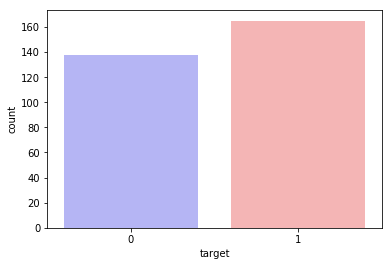

In [20]:
sns.countplot(x='target',data=dt,palette='bwr')
plt.show()

The target variable seems reasonabily balanced, so I decided not to do anything.

In [21]:
num_no_disease = len(dt[dt.target == 0])
num_disease = len(dt[dt.target == 1])

print('Percentage of patients do NOT have heart disease: {0:0.2f}'.format((num_no_disease / (len(dt.target))*100)))
print('Percentage of patients have heart disease: {0:0.2f}'.format((num_disease / (len(dt.target))*100)))

Percentage of patients do NOT have heart disease: 45.54
Percentage of patients have heart disease: 54.46


#### Categorical Features 

In [22]:
cat_features.columns

Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'exercise_induced_angina', 'st_slope', 'thalassemia'],
      dtype='object')

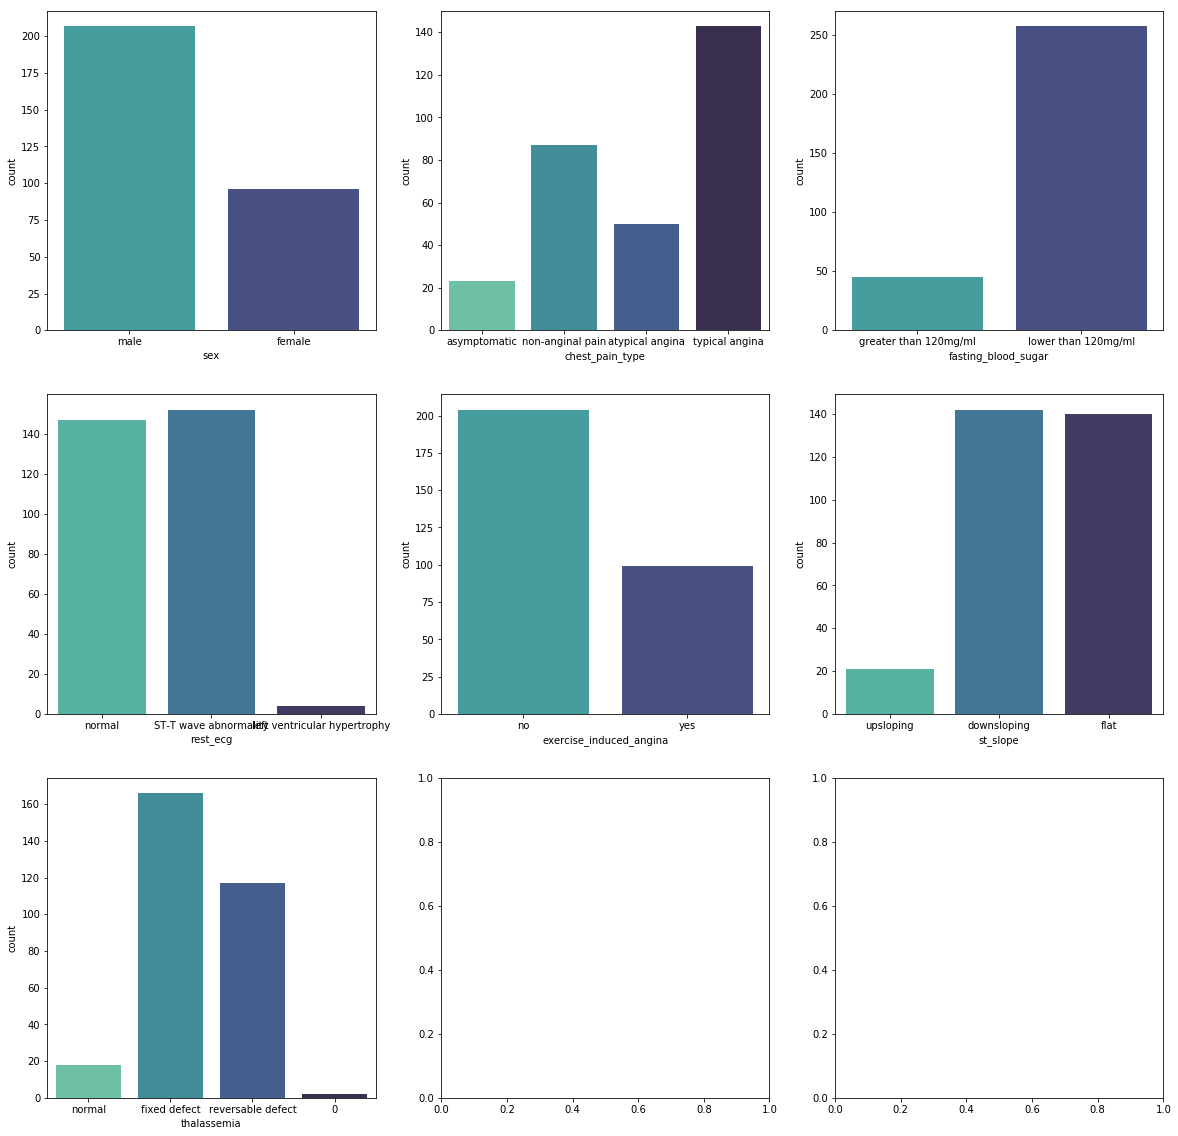

In [23]:
# check distribution for categorical variables
fig,ax = plt.subplots(3,3,figsize=(20,20))
sns.countplot(x='sex', data= dt, palette='mako_r',ax=ax[0][0])
sns.countplot(x='chest_pain_type', data= dt, palette='mako_r',ax=ax[0][1])
sns.countplot(x='fasting_blood_sugar', data= dt, palette='mako_r',ax=ax[0][2])
sns.countplot(x='rest_ecg', data= dt, palette='mako_r',ax=ax[1][0])
sns.countplot(x='exercise_induced_angina', data= dt, palette='mako_r',ax=ax[1][1])
sns.countplot(x='st_slope', data= dt, palette='mako_r',ax=ax[1][2])
sns.countplot(x='thalassemia', data= dt, palette='mako_r',ax=ax[2][0])

plt.show()

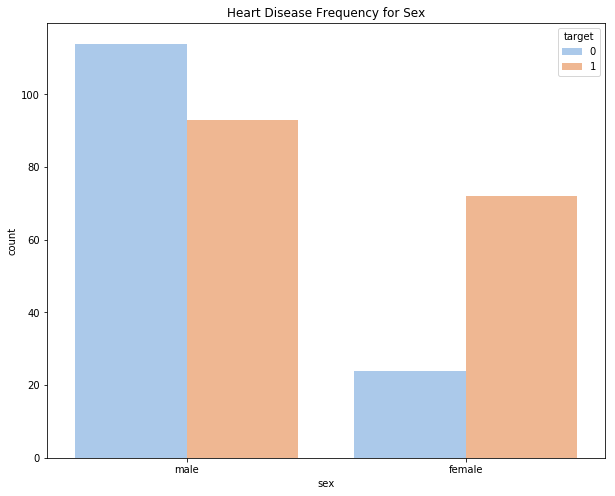

In [24]:
fig, ax = plt.subplots(figsize = (10,8))
sns.countplot(x = dt.sex,hue = dt.target,palette = 'pastel')
plt.title('Heart Disease Frequency for Sex')
plt.show()

* Females seem to have higher diseased/healthy ratio.

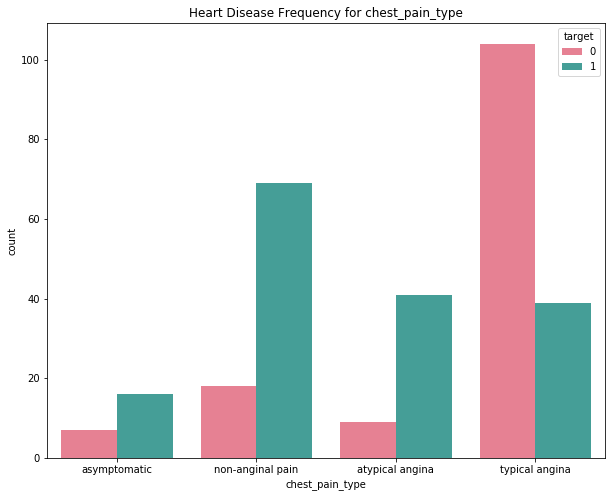

In [25]:
fig, ax = plt.subplots(figsize = (10,8))
sns.countplot(x = dt.chest_pain_type,hue = dt.target,palette = 'husl')
plt.title('Heart Disease Frequency for chest_pain_type')
plt.show()

* It seems atypical angina chest pain type has the highest diseased/healthy ratio, where typical angina has the lowest.

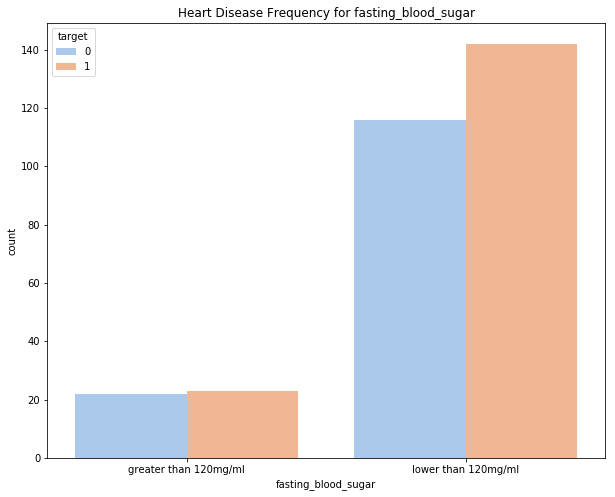

In [26]:
fig, ax = plt.subplots(figsize = (10,8))
sns.countplot(x = dt.fasting_blood_sugar,hue = dt.target,palette = 'pastel')
plt.title('Heart Disease Frequency for fasting_blood_sugar')
plt.show()

* Lower blood sugar group has more people having disease compared to higher blood sugar group. 

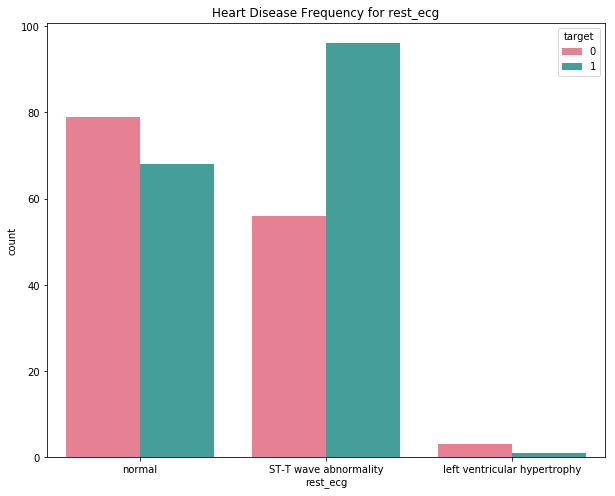

In [27]:
fig, ax = plt.subplots(figsize = (10,8))
sns.countplot(x = dt.rest_ecg,hue = dt.target,palette = 'husl')
plt.title('Heart Disease Frequency for rest_ecg')
plt.show()

* The data has very few observations for left ventrical hypertrophy.
* People have normal rest ecg seems to have similar number of healthy and diseased observations.
* ST-T wave abnormal population have higher diseased/healthy ratio.

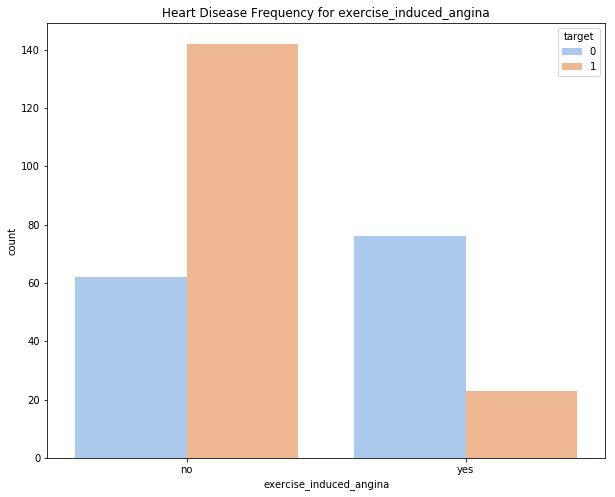

In [28]:
fig, ax = plt.subplots(figsize = (10,8))
sns.countplot(x = dt.exercise_induced_angina,hue = dt.target,palette = 'pastel')
plt.title('Heart Disease Frequency for exercise_induced_angina')
plt.show()

* People who doesn't have exercise induced angina has higher diseased ratio, while the other group has more healthy population than diseased.

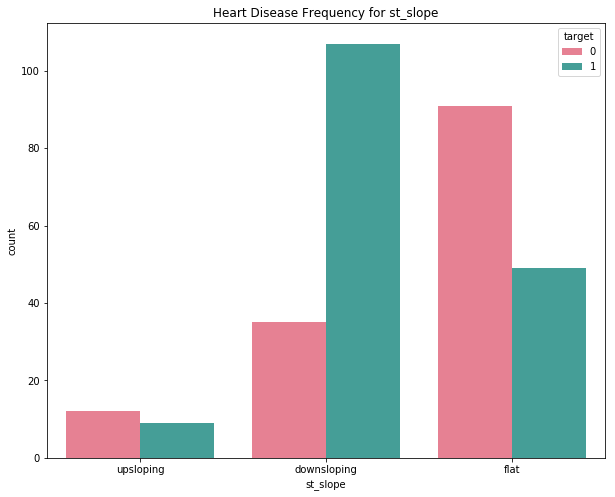

In [29]:
fig, ax = plt.subplots(figsize = (10,8))
sns.countplot(x = dt.st_slope,hue = dt.target,palette = 'husl')
plt.title('Heart Disease Frequency for st_slope')
plt.show()

* Downslope in ST slope group has a lot more diseased observations than healthy.

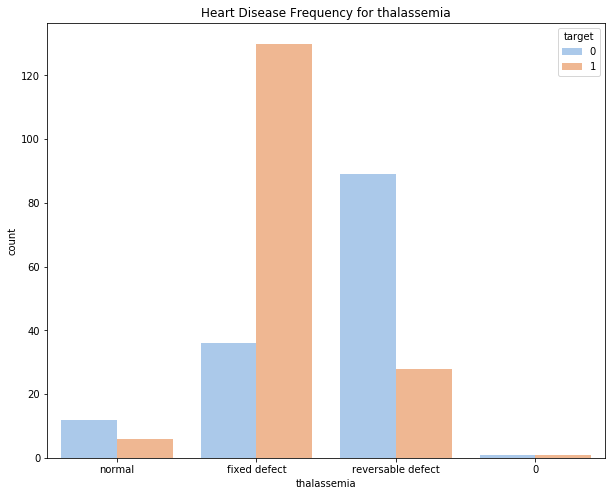

In [30]:
fig, ax = plt.subplots(figsize = (10,8))
sns.countplot(x = dt.thalassemia,hue = dt.target,palette = 'pastel')
plt.title('Heart Disease Frequency for thalassemia')
plt.show()

* Thalassemia fixed defect stands out, because of the number of diseased observations.

In [31]:
# convert categorical variables to dummy variables
# drop_first to remove 1 of the 2 generated columns for each variable, to avoid multicollinearity (high intercorrelation for independent variables)
dt_dummy = pd.get_dummies(dt, drop_first=True) 
dt_dummy.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0
1,37,130,250,187,3.5,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0
2,41,130,204,172,1.4,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0
3,56,120,236,178,0.8,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0


In [32]:
dt.shape

(303, 14)

***
<a id='ex1'></a>
<font size='3'>

**Exercise1**:   
* Please use 'groupby()' function to calculate the mean 'age' by 'target'. Then create a bar plot.
</font>

***
<a id='model'></a>
## 4. Fitting a model and parameter tuning

In [33]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(dt_dummy.drop('target',1),
                                                   dt_dummy['target'], test_size = 0.2,
                                                   random_state = 10)

Even though standardization is not necessary for tree based models, where they only cares about feature ranks, I will apply it to the numerical variabls in the training dataset to make the feature importance comparable.

In [34]:
std_scaler = preprocessing.StandardScaler()

names = num_features.columns

# apply standardization only to training set
X_train[names] = std_scaler.fit_transform(X_train[names])
# apply the scaler to test data to avoid info leakage
X_test[names] = std_scaler.transform(X_test[names])

X_train.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
286,0.515843,0.151973,-0.823411,0.517860,-0.163186,1.302100,1,0,0,0,1,0,0,0,0,0,1,0,0
102,0.953857,0.483800,-0.994193,1.270945,-0.860600,1.302100,0,1,0,0,1,0,0,0,0,0,1,0,0
242,1.063361,0.760322,-0.671604,-0.811113,0.882934,1.302100,1,0,0,1,1,0,1,0,1,0,0,1,0
65,-2.112242,0.373191,-1.221903,1.403842,0.359874,-0.692255,0,0,0,1,1,0,0,0,0,0,1,0,0
35,-0.907703,0.594409,-1.335758,0.429262,0.359874,-0.692255,0,0,1,0,1,0,1,1,0,1,1,0,0


In [35]:
rfc = RandomForestClassifier(random_state=10)

In [36]:
# model with grid search 
param_grid = {
    'n_estimators': [10,50,100],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
}

CV_rfc = GridSearchCV(estimator=rfc,
                      param_grid=param_grid,
                      cv = 5)
CV_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
# another more compact way of doing GridSearchCV
# Define a dictionary of parameters for RandomForestClassifier as a parameter of GridSearchCV 
params = {
    'n_estimators': [10,50,100],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
}


# define a scoring dictionary as a parameter of GridSearchCV
# if not specified, scoring by default: accuracy for classification, r2_score for regression
scoring = {'AUC': 'roc_auc', 'F1': 'f1','Accuracy': make_scorer(accuracy_score)}

def search_model(X_train, y_train, est, param_grid, scoring, cv, refit=False):
    model = GridSearchCV(estimator = est,
                        param_grid=params,
                        scoring = scoring,
                        verbose = 10,
                        refit = refit,
                        cv = cv)
    # fit grid_search model
    model.fit(X_train,y_train)
    print('Best parameters set:', model.best_params_)
    print('Best score {:0.3f}'.format(model.best_score_)) # taking average of the 5 folds for the best set of paramaters
    return model




CV_rfc = search_model(X_train, 
                      y_train, 
                      rfc,
                      param_grid,
                      scoring,
                      cv = 5,
                      refit = 'AUC') # refit the model using the best AUC score, best score also based on AUC 

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] criterion=gini, max_depth=4, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=4, n_estimators=10, AUC=0.8732993197278912, F1=0.8125000000000001, Accuracy=0.7551020408163265, total=   0.0s
[CV] criterion=gini, max_depth=4, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=4, n_estimators=10, AUC=0.8554421768707483, F1=0.8666666666666666, Accuracy=0.8367346938775511, total=   0.0s
[CV] criterion=gini, max_depth=4, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=4, n_estimators=10, AUC=0.9642857142857143, F1=0.912280701754386, Accuracy=0.8979591836734694, total=   0.0s
[CV] criterion=gini, max_depth=4, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=4, n_estimators=10, AUC=0.942857142857143, F1=0.8235294117647057, Accuracy=0.8125, total=   0.0s
[CV] criterion=gini, max_depth=4, n_estimators=10 ....................
[CV]  criterion=gini, max_dep

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, n_estimators=50, AUC=0.9710884353741497, F1=0.912280701754386, Accuracy=0.8979591836734694, total=   0.0s
[CV] criterion=gini, max_depth=4, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=4, n_estimators=50, AUC=0.9839285714285715, F1=0.9433962264150945, Accuracy=0.9375, total=   0.0s
[CV] criterion=gini, max_depth=4, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=4, n_estimators=50, AUC=0.8925925925925926, F1=0.847457627118644, Accuracy=0.8085106382978723, total=   0.0s
[CV] criterion=gini, max_depth=4, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=100, AUC=0.8962585034013605, F1=0.8615384615384616, Accuracy=0.8163265306122449, total=   0.1s
[CV] criterion=gini, max_depth=4, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, n_estimators=100, AUC=0.8418367346938775, F1=0.8524590163934426, Accuracy=0.8163265306122449, total=   0.1s
[CV] criterion=gini, max_depth=4, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=100, AUC=0.9625850340136055, F1=0.8771929824561403, Accuracy=0.8571428571428571, total=   0.1s
[CV] criterion=gini, max_depth=4, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=100, AUC=0.9857142857142858, F1=0.9433962264150945, Accuracy=0.9375, total=   0.1s
[CV] criterion=gini, max_depth=4, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=4, n_estimators=100, AUC=0.9018518518518518, F1=0.8813559322033898, Accuracy=0.851063829787234, total=   0.1s
[CV] criterion=gini, max_depth=5, n_estimators=10 ....................
[CV]  criterion=gini, max_depth=5, n_estimators=10, AUC=0.8724489795918368, F1=0.7936507936507937, Accuracy=0.7346938775510204, total=   0.0s
[CV] criterion=

[CV]  criterion=gini, max_depth=7, n_estimators=50, AUC=0.9710884353741496, F1=0.8771929824561403, Accuracy=0.8571428571428571, total=   0.0s
[CV] criterion=gini, max_depth=7, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=7, n_estimators=50, AUC=0.9750000000000001, F1=0.9019607843137255, Accuracy=0.8958333333333334, total=   0.0s
[CV] criterion=gini, max_depth=7, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=7, n_estimators=50, AUC=0.8962962962962963, F1=0.8524590163934426, Accuracy=0.8085106382978723, total=   0.0s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=7, n_estimators=100, AUC=0.8843537414965986, F1=0.8571428571428572, Accuracy=0.8163265306122449, total=   0.1s
[CV] criterion=gini, max_depth=7, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=7, n_estimators=100, AUC=0.8248299319727891, F1=0.8070175438596492, Accuracy=0.7755102040816326, total=   0.1s
[CV]

[CV]  criterion=entropy, max_depth=5, n_estimators=50, AUC=0.9540816326530611, F1=0.8620689655172413, Accuracy=0.8367346938775511, total=   0.0s
[CV] criterion=entropy, max_depth=5, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=5, n_estimators=50, AUC=0.9785714285714286, F1=0.923076923076923, Accuracy=0.9166666666666666, total=   0.0s
[CV] criterion=entropy, max_depth=5, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=5, n_estimators=50, AUC=0.9074074074074074, F1=0.8524590163934426, Accuracy=0.8085106382978723, total=   0.0s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=100, AUC=0.8809523809523809, F1=0.8307692307692307, Accuracy=0.7755102040816326, total=   0.1s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=5, n_estimators=100, AUC=0.8163265306122449, F1=0.8333333333333334, Accuracy=0.7959183673469388, tota

[CV]  criterion=entropy, max_depth=8, n_estimators=50, AUC=0.9506802721088434, F1=0.8679245283018867, Accuracy=0.8571428571428571, total=   0.0s
[CV] criterion=entropy, max_depth=8, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=8, n_estimators=50, AUC=0.9758928571428571, F1=0.9019607843137255, Accuracy=0.8958333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=8, n_estimators=50 .................
[CV]  criterion=entropy, max_depth=8, n_estimators=50, AUC=0.925925925925926, F1=0.8813559322033898, Accuracy=0.851063829787234, total=   0.0s
[CV] criterion=entropy, max_depth=8, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=100, AUC=0.8639455782312926, F1=0.8437499999999999, Accuracy=0.7959183673469388, total=   0.1s
[CV] criterion=entropy, max_depth=8, n_estimators=100 ................
[CV]  criterion=entropy, max_depth=8, n_estimators=100, AUC=0.8214285714285715, F1=0.8421052631578947, Accuracy=0.8163265306122449, total

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    7.9s finished


***
<a id='prediction'></a>
## 5. Prediction and Evaluation

In [38]:
# prediction 
pred_test_prob = CV_rfc.predict_proba(X_test)
pred_test = CV_rfc.predict(X_test)

# predict on training set 
pred_train_prob = CV_rfc.predict_proba(X_train)
pred_train = CV_rfc.predict(X_train)

In [39]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.73      0.85      0.79        26

   micro avg       0.80      0.80      0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



f1-scores for the two labels is slightly different, but acceptable. Or you can apply SMOTE method to deal with imbalance data. 

In [40]:
# Confusion matrix 
cm = confusion_matrix(y_test, pred_test)
print(pd.DataFrame(cm, columns = ['pred:0','pred:1'], index = ['true:0','true:1']))

        pred:0  pred:1
true:0      27       8
true:1       4      22


In [41]:
# sensitivity/recall = tp/tp+fn
# precision = tp/tp+fp
tn, fp, fn, tp = confusion_matrix(y_test, pred_test).ravel()
(tn, fp, fn, tp)


(27, 8, 4, 22)

This seems reasonable, Let's take a look at ROC curve

Train AUC:0.97
Test AUC:0.92


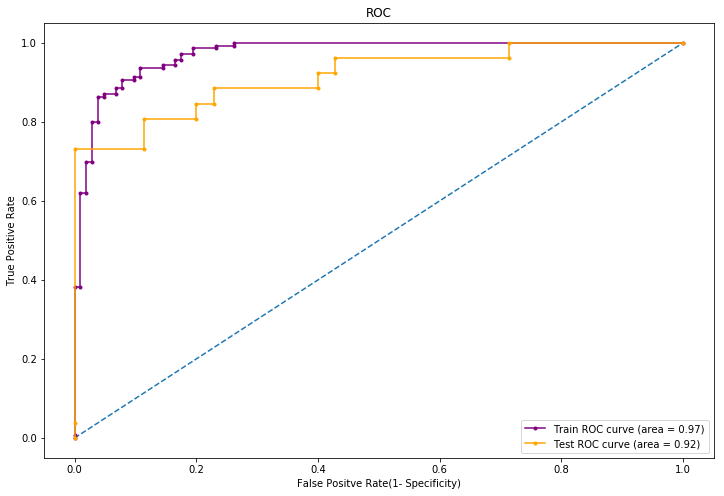

In [42]:
# ROC 
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_train_prob[:,1])
fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_test_prob[:,1])

# Calculate AUC
print('Train AUC:{0:0.2f}'.format(auc(fpr_train, tpr_train)))
print('Test AUC:{0:0.2f}'.format(auc(fpr_test, tpr_test)))

fig, ax = plt.subplots(figsize = (12,8))
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr_train, tpr_train, marker = '.', color = 'purple', label = 'Train ROC curve (area = %0.2f)'% auc(fpr_train, tpr_train))
plt.plot(fpr_test, tpr_test, marker = '.', color = 'orange', label = 'Test ROC curve (area = %0.2f)'% auc(fpr_test, tpr_test))

plt.xlabel('False Positve Rate(1- Specificity)')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()


* Although the training AUC is higher than test AUC, since we used 5 folds CV for training, I would not consider any test results that are better than the CV results (AUC = 0.917) to be realistic. 
* The Test AUC = 0.92 is very close to CV result AUC = 0.917, hence the model is performimg well.<br>
* As a rule of thumb, an AUC can be classed as follows:<br>
0.90 - 1.00 = excellent<br>
0.80 - 0.90 = good<br>
0.70 - 0.80 = fair<br>
0.60 - 0.70 = poor<br>
0.50 - 0.60 = fail<br>


[Overfitted model](https://stats.stackexchange.com/questions/220807/is-overfitted-model-with-higher-auc-on-test-sample-better-than-not-overfitted-on)

In [43]:
# refit model with best paramaters for feature importance
best_model = RandomForestClassifier(n_estimators = 100,max_depth = 4, criterion = 'gini')
best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

***
<a id='explanation'></a>
## 6. Explanation

In [44]:
# estimator = best_model.estimators_[99]
# feature_names = [i for i in X_train.columns]

# y_train_str = y_train.astype('str')
# y_train_str[y_train_str == '0'] = 'no disease'
# y_train_str[y_train_str == '1'] = 'disease'
# y_train_str = y_train_str.values

In [45]:
# create a decision tree
#code from https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

# export_graphviz(estimator, out_file='tree.dot', 
#                 feature_names = feature_names,
#                 class_names = y_train_str,
#                 rounded = True, proportion = True, 
#                 label='root',
#                 precision = 2, filled = True)

# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# from IPython.display import Image
# Image(filename = 'tree.png')

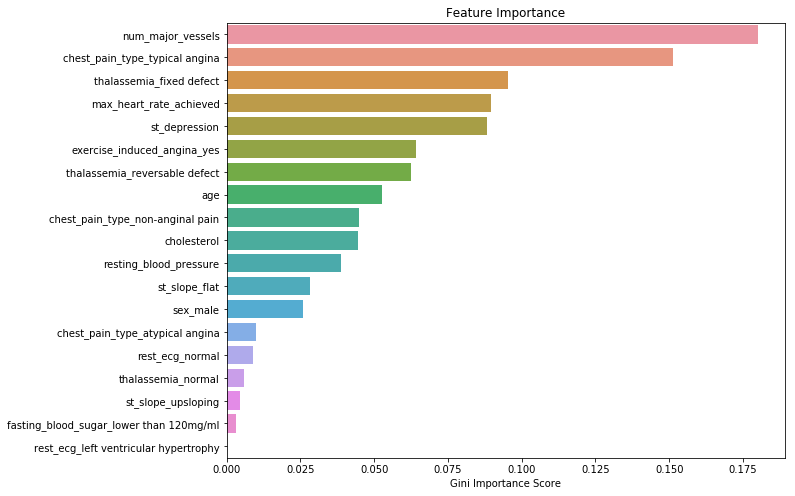

In [46]:
# sklearn random forest feature importance: mean decrease in impurity (or gini importance)
importances = best_model.feature_importances_
# Sort feature importances in descending order
# argsort: returns position from feature_imp from least -> most, starting from 0
indices = np.argsort(importances)[::-1] # [::-1] <=> reverse to get most -> least

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# create plot 
fig, ax = plt.subplots(figsize = (10,8))

# add bar 
sns.barplot(importances[indices], names, orient = "h")

# Create plot title
plt.xlabel('Gini Importance Score')
plt.title("Feature Importance")

# show plot 
plt.show()

* Sklearn RandomForets uses Gini Importance (mean decrease in impurity importance of a feature), is computed by measuring how effective the feature is at reducing uncertainty (classifiers) or variance (regressors) when creating decision trees within RFs.
* This is not giving accurate results when potential predictor variables vary in their scale of measurement or their number of categories

***
* [Permutation Importance](https://www.kaggle.com/dansbecker/permutation-importance) works by shuffling individual variables in the test data after a model has been fitted, and seeing the effect on accuracy. 
    1. Fast to calculate
    2. Widely used and understood
    3. Consistent with properties we would want a feature importance measure to have.     

[Permutation Importance Documentation](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html)

In [47]:
# permutation importance 
perm = PermutationImportance(best_model,random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


Weight,Feature
0.0459 ± 0.0564,num_major_vessels
0.0295 ± 0.0525,thalassemia_fixed defect
0.0295 ± 0.0601,chest_pain_type_typical angina
0.0098 ± 0.0161,thalassemia_reversable defect
0.0066 ± 0.0161,exercise_induced_angina_yes
0.0033 ± 0.0482,st_depression
0 ± 0.0000,rest_ecg_normal
0 ± 0.0000,rest_ecg_left ventricular hypertrophy
0 ± 0.0000,fasting_blood_sugar_lower than 120mg/ml
0 ± 0.0000,thalassemia_normal


* It seems the most importance feature is number of major vessels. We will take a colser look at it by creating [Partial Dependence Plot](https://www.kaggle.com/dansbecker/partial-plots) later.
* chest pain type typical angina is also important, from [reading](https://www.harringtonhospital.org/typical-and-atypical-angina-what-to-look-for/) we know that typical angina is more severe than atypical angina,which is caused by blockage or plaque buildup in the coronary arteries 
* The [ST segment](https://en.wikipedia.org/wiki/ST_depression) represents the heart's electrical activity immediately after the right and left ventricles have contracted,pumping blood to the lungs and the rest of the body.Upward or downward shifts can represent decreased blood flow to the heart. 

***
[Partial dependence plots](https://www.kaggle.com/dansbecker/partial-plots) (PDP or PD plot) shows the marginal effect one or two features have on the predicted outcome of a machine learning model (J. H. Friedman 200127). 

[PDP reference book](https://christophm.github.io/interpretable-ml-book/pdp.html)

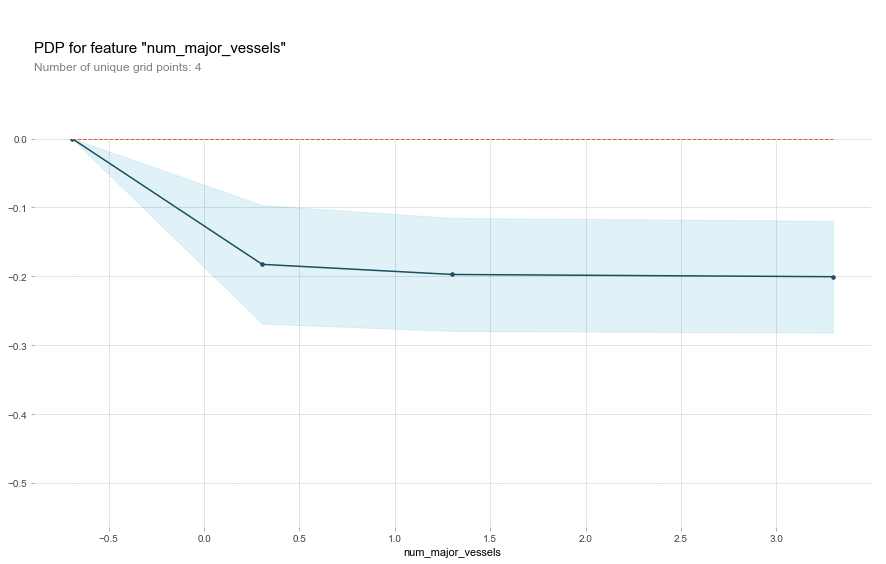

In [48]:
# Partial dependence plot 
base_features = X_train.columns.values.tolist()

feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=best_model, dataset=X_train,model_features=base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


We can see the number of major vessels increases decreases the chance of having heart diseases, which make sense because it increases blood stream to the heart. 

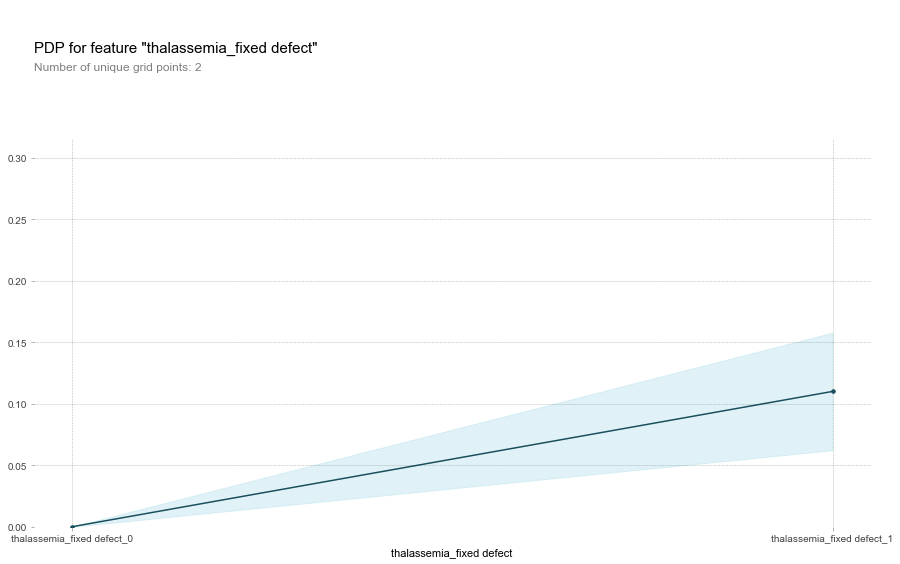

In [49]:
base_features = X_train.columns.values.tolist()

feat_name = 'thalassemia_fixed defect'
pdp_dist = pdp.pdp_isolate(model=best_model, dataset=X_train,model_features=base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


Patients with thalassemia_fixed defect have higher probability of having heart diseases.

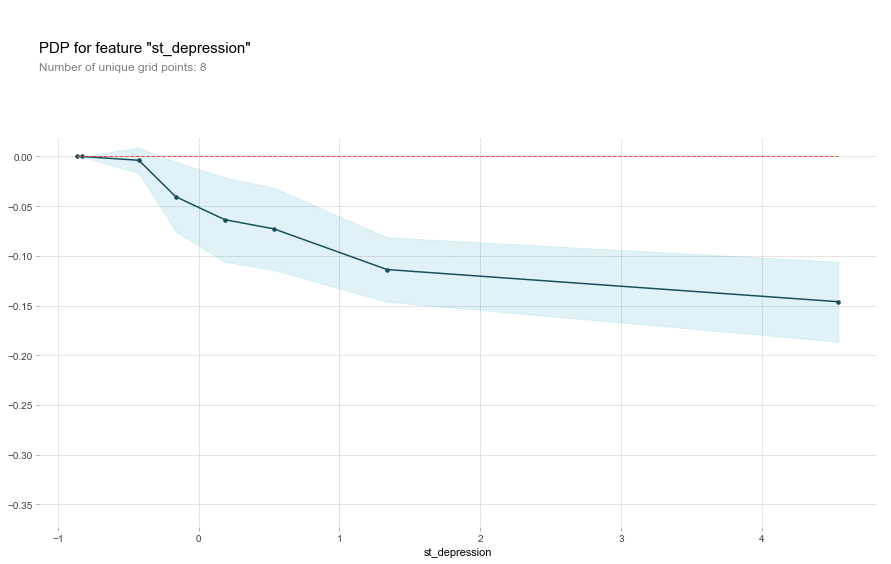

In [50]:
base_features = X_train.columns.values.tolist()

feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model=best_model, dataset=X_train,model_features=base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

The odds of having heart diseases is reduced as st_depression increases, where variable [st_depression](https://www.sciencedirect.com/topics/medicine-and-dentistry/st-segment) is described as 'ST depression induced by exercise relative to rest'.It seems to suggest the higher the value, the higher the probability of heart diseases. This is opposite from what we observed in this plot. Let's check the interaction of st_depression with st_slope_upsloping and st_slope_flat.

<img src='day3 data and image/ST-segment.png' width='500'>


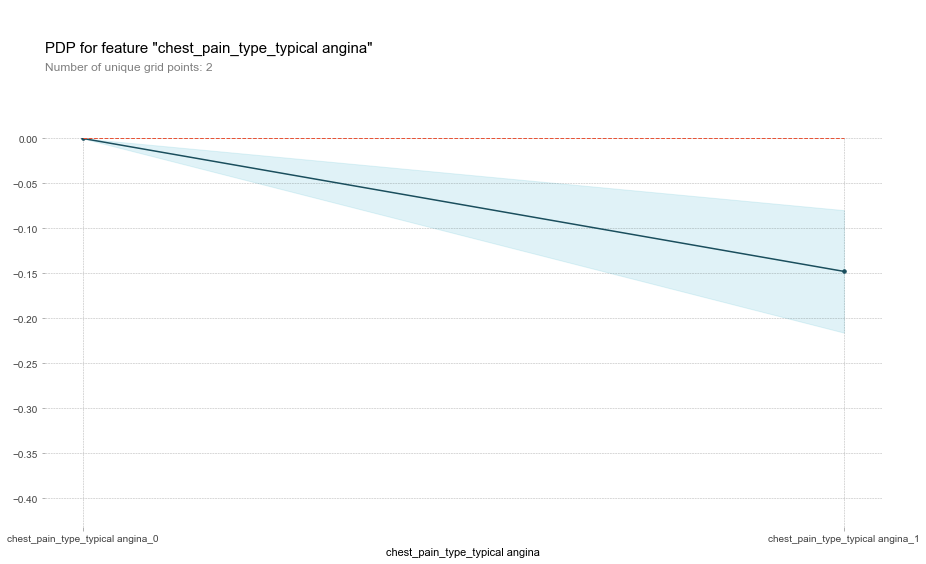

In [51]:
base_features = X_train.columns.values.tolist()

feat_name = 'chest_pain_type_typical angina'
pdp_dist = pdp.pdp_isolate(model=best_model, dataset=X_train,model_features=base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

Chest pain type is typical angina decreases the odds of having a heart disease. 

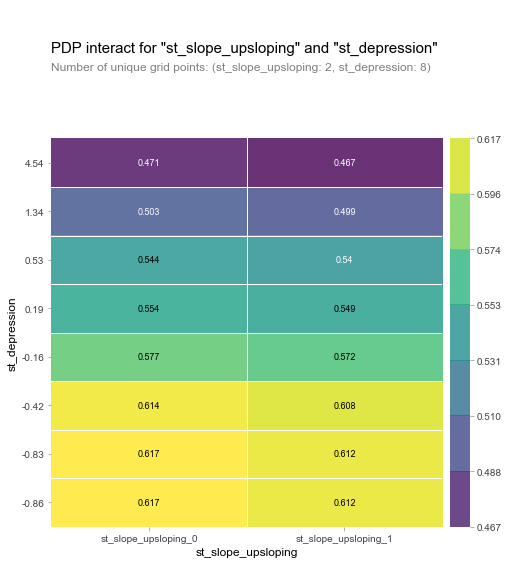

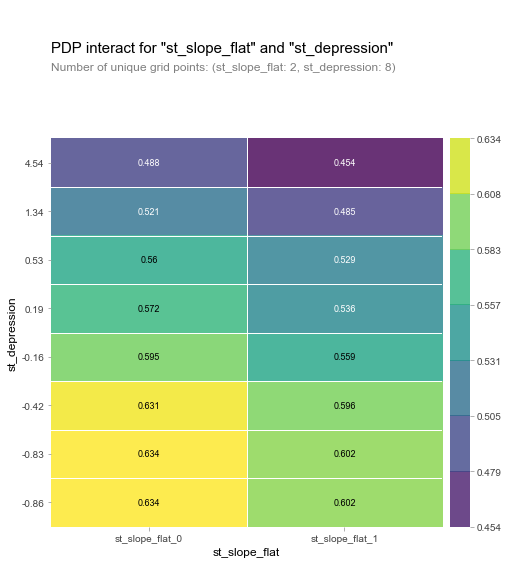

In [52]:
st_dep_up = pdp.pdp_interact(model = best_model,model_features=base_features,dataset= X_train,
                             features = ['st_slope_upsloping','st_depression'])
pdp.pdp_interact_plot(pdp_interact_out= st_dep_up, feature_names=['st_slope_upsloping','st_depression'], plot_type='grid')                     


st_dep_flat = pdp.pdp_interact(model = best_model,model_features=base_features,dataset= X_train,
                             features = ['st_slope_flat','st_depression'])
pdp.pdp_interact_plot(pdp_interact_out= st_dep_flat, feature_names=['st_slope_flat','st_depression'], plot_type='grid')                     

plt.show()

The interaction plots also suggest higher ST depression is good.The interaction of ST depression and ST slope flat shows flat slope is better than not flat slope. Next, we'll look at the SHAP values.

***
[SHAP values](https://www.kaggle.com/dansbecker/shap-values) show how much a given feature changed our prediction (compared to if we made that prediction at some baseline value of that feature).The base value is the mean of the model output over the background dataset.

[Base value](https://github.com/slundberg/shap/issues/352)<br>
[SHAP documentation](https://shap.readthedocs.io/en/latest/)<br>
[Interpretation](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values)

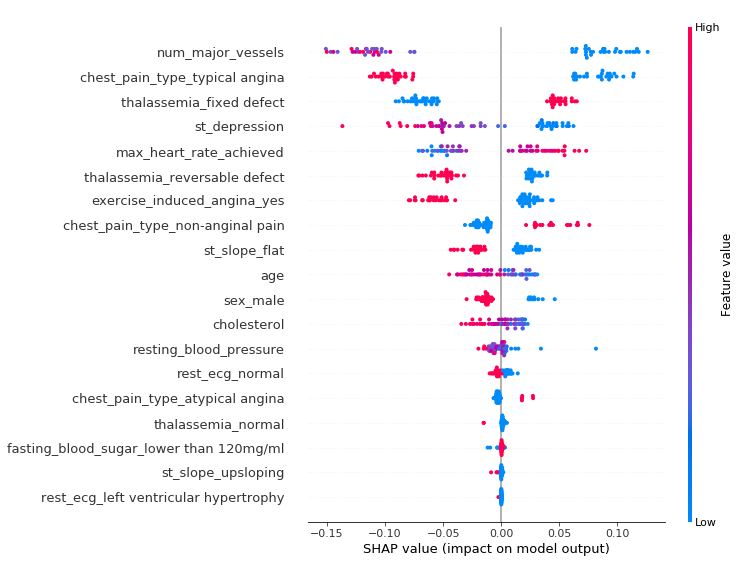

In [53]:
# create object that can calculate SHAP values
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Make plots, index of [1] to get the SHAP value for Disease['Yes'] class
shap.summary_plot(shap_values[1],X_test)


The top most importance features are almost the same as the other importnce plots in the previous sessions.We have the following observations:
1. In descending order of feature importance.
2. **number of major vessels**: division is pretty clear.The more major vessels a patient has, the less likely he/she will have heart disease. e.g.: the upper left red point is for a patient that has a high number of major vessels, reducing the prediction to the positive class by 0.15.
3. **chest_pain_type_typical angina**: having typical angina is good, it reduced the prediction of having heart disease. Need extra background information to understand this.  
4. **thalassemia_fixed defect**: not having fixed thalassemia defect is good.Less likely to have heart disease.
5. **st_depression**: the larger the number, the better. This aligns with the PDP plot output.
6. **max_heart_rate_achieved**: medium to low values is good, which make sense.
7. **thalassemia_reversable defect**: a reversable thalassemia defect is good.
8. **exercise_induced_angina_yes**: exercise induced angina is better than non-exercise induced angina. 
9. **chest_pain_type_non-anginal pain**: not having anginal chest pain is good compared to having it.
10. **st_slope_flat**:flat ST slope is good.
11. **age**: usually doesn't affect the prediction. 
12. **sex**: being a man decreases the rick of having heart disease.
13. **st_slope_upsloping**: the model ignores this feature.

***
<a id='conclusion'></a>
## 7. Conclusion
<font size='3'>   

In this demo example, we've learn the basic steps of creating a machine learning model with some useful tools for interpretation. As a quick note, parameter tuning is more of an art than a science, it take more time in some problems,and the process varies for different data and the exact problem you are solving.
</font>

***
<a id='practice'></a>
## 8. Practice & QA
<font size='3'>

1. Please try different numbers for Random Forest parameters in the 'param' dictionary, and observe the changes.
2. Please feel free to ask questions.
</font>

***
<a id='useful'></a>
## 9. Useful topics and packages 
<font size='3'>

1. [Evaluation metrics for multi-class classification problems](https://scikit-learn.org/stable/modules/model_evaluation.html)
2. [Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html)
3. [Random Forest Feature Importance](https://explained.ai/rf-importance/)
4. [Missing value imputation in Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
</font>